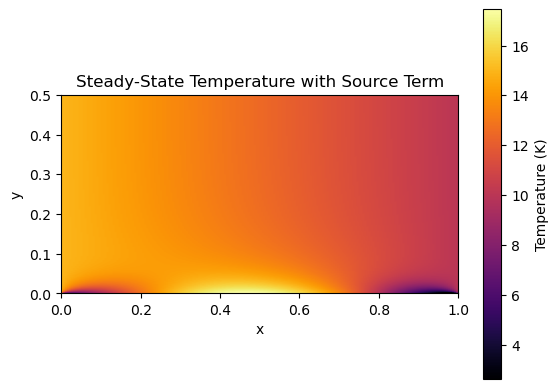

In [30]:
from fipy import CellVariable, Grid2D, DiffusionTerm, ImplicitSourceTerm, FixedFlux
import numpy as np
import matplotlib.pyplot as plt

# --- Domain ---
L = 1.0      # x-length
H = 0.5      # y-length
nx = 200
ny = 200
dx = L / nx
dy = H / ny

mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

# --- Temperature variable ---
T = CellVariable(name="Temperature", mesh=mesh, value=0.0)

# --- Spatially varying conductivity ---
# k = 16.0 * (mesh.cellCenters[1] / H + 1.0)  # linear in y
k = 16.0

# --- PDE: steady-state conduction + source ---
#eq = DiffusionTerm(coeff=k) + ImplicitSourceTerm(coeff=-30000.0) == -500000.0
eq = DiffusionTerm(coeff=k) + ImplicitSourceTerm(coeff=0) == 0
# LHS: DiffusionTerm + 30000*T
# RHS: 500000

# --- Boundary conditions ---
x_face, y_face = mesh.faceCenters

# Dirichlet BCs
T.constrain(15.0, mesh.facesBottom)  # Bottom
T.constrain(10.0, mesh.facesTop)     # Top
T_right = 5.0 * (1 - y_face[mesh.facesRight] / H) + 15.0 * np.sin(np.pi * y_face[mesh.facesRight] / H)
T.constrain(T_right, mesh.facesRight)

# Left face: explicit Neumann dT/dx=0
T.faceGrad[0, mesh.facesLeft.value] = 0.0  # x-gradient = 0

# --- Solve ---
eq.solve(var=T)

# --- Visualization ---
T_array = np.reshape(T.value, (nx, ny)).T
plt.imshow(np.flipud(T_array), extent=[0,L,0,H], origin='lower', cmap='inferno')
plt.colorbar(label='Temperature (K)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Steady-State Temperature with Source Term')
plt.show()